In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('/content/netflix_titles.csv', index_col='show_id')


In [5]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [7]:
df.isnull().sum()

,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3
listed_in,0


Handling Null Values

In [11]:
df['director'] = df['director'].fillna('Unknown')

In [12]:
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')


In [13]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [14]:
df.isnull().sum()

,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


Checking Duplicates values

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df["title"].duplicated().sum()

np.int64(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       8807 non-null   object
 5   date_added    8807 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


Changing Data Type

In [18]:
df["release_year"] = pd.to_datetime(df["release_year"], format='%Y')


In [19]:
df['date_added'] = df['date_added'].str.strip() #remove leading and trailing spaces.
df['date_added'] = pd.to_datetime(df['date_added'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   cast          8807 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8807 non-null   datetime64[ns]
 6   release_year  8807 non-null   datetime64[ns]
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   object        
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: datetime64[ns](2), object(9)
memory usage: 825.7+ KB


In [21]:
df['type'].nunique()

2

In [22]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

Extract Text from Duration Column and Convert into Minutes as Average

Create New Columnn

In [23]:
df["duration_numeric"] = df["duration"].str.extract(r'(\d+)').astype(int)

print(df[["duration", "duration_numeric"]])

          duration  duration_numeric
show_id                             
s1          90 min                90
s2       2 Seasons                 2
s3        1 Season                 1
s4        1 Season                 1
s5       2 Seasons                 2
...            ...               ...
s8803      158 min               158
s8804    2 Seasons                 2
s8805       88 min                88
s8806       88 min                88
s8807      111 min               111

[8807 rows x 2 columns]


In [24]:
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2


In [25]:
df["duration_minutes"] = df.apply(
    lambda x: x["duration_numeric"] * 600 if "Season" in x["duration"] else x["duration_numeric"],
    axis=1
)

In [26]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric,duration_minutes
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,90
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,1200
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,600
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,600
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,1200


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              8807 non-null   object        
 1   title             8807 non-null   object        
 2   director          8807 non-null   object        
 3   cast              8807 non-null   object        
 4   country           8807 non-null   object        
 5   date_added        8807 non-null   datetime64[ns]
 6   release_year      8807 non-null   datetime64[ns]
 7   rating            8807 non-null   object        
 8   duration          8807 non-null   object        
 9   listed_in         8807 non-null   object        
 10  description       8807 non-null   object        
 11  duration_numeric  8807 non-null   int64         
 12  duration_minutes  8807 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(9)
memory usage: 963.3+ KB


In [28]:
df["content_type"] = df["duration"].apply(lambda x: "Movie" if "min" in x else "TV Show")

Drop Column

In [29]:
df = df.drop(columns=["duration_numeric"])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              8807 non-null   object        
 1   title             8807 non-null   object        
 2   director          8807 non-null   object        
 3   cast              8807 non-null   object        
 4   country           8807 non-null   object        
 5   date_added        8807 non-null   datetime64[ns]
 6   release_year      8807 non-null   datetime64[ns]
 7   rating            8807 non-null   object        
 8   duration          8807 non-null   object        
 9   listed_in         8807 non-null   object        
 10  description       8807 non-null   object        
 11  duration_minutes  8807 non-null   int64         
 12  content_type      8807 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(10)
memory usage: 963.3+ KB


In [31]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,content_type
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,Movie
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1200,TV Show
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,600,TV Show
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",600,TV Show
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1200,TV Show


In [32]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,content_type
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,Movie
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1200,TV Show
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,600,TV Show
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",600,TV Show
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1200,TV Show


Exploratory Data Analysis (EDA) - Summary Statistics

In [33]:
df.describe()

,date_added,release_year,duration_minutes
count,8807,8807,8807.000000
mean,2019-05-17 12:13:09.735437824,2014-03-07 16:27:24.873396224,391.257977
min,2008-01-01 00:00:00,1925-01-01 00:00:00,3.000000
25%,2018-04-06 00:00:00,2013-01-01 00:00:00,92.000000
50%,2019-07-04 00:00:00,2017-01-01 00:00:00,112.000000
75%,2020-08-18 00:00:00,2019-01-01 00:00:00,600.000000
max,2021-09-25 00:00:00,2021-01-01 00:00:00,10200.000000
std,NaN,NaN,684.989314


In [34]:
df['duration_minutes'].max()

10200

In [35]:
df['duration_minutes'].median()

112.0

Data Insights & Aggregations

In [36]:
df['director'].unique()

array(['Kirsten Johnson', 'Unknown', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [37]:
df['director'].nunique()

4529

In [38]:
df['content_type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [39]:
df.loc[df['country'].idxmin()]

,s366
type,Movie
title,Eyes of a Thief
director,Najwa Najjar
cast,"Khaled Abol El Naga, Souad Massi, Suhail Hadda..."
country,", France, Algeria"
date_added,2021-07-30 00:00:00
release_year,2014-01-01 00:00:00
rating,TV-14
duration,103 min
listed_in,"Dramas, Independent Movies, International Movies"


In [40]:
df['country'].idxmax()

's2447'

In [41]:
df['duration'].idxmax()

's52'

In [42]:
df['duration_minutes'].idxmax()

's549'

Data Visualization

Bar Chart

<ipython-input-43-d75a63dec17a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["content_type"], palette="pastel")


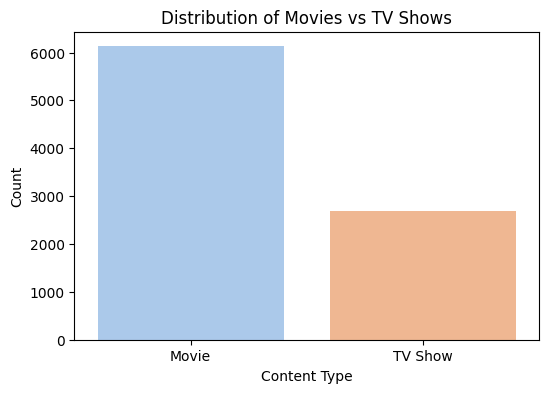

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["content_type"], palette="pastel")
plt.title("Distribution of Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

Histrogram Chart

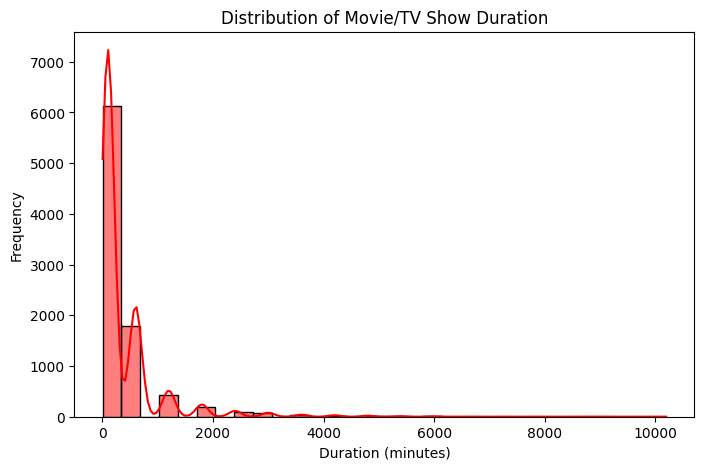

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(df["duration_minutes"], bins=30, kde=True, color='red')
plt.title("Distribution of Movie/TV Show Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

Box Plot

<ipython-input-45-c9a6023fbe16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["content_type"], y=df["duration_minutes"], palette="Set2")


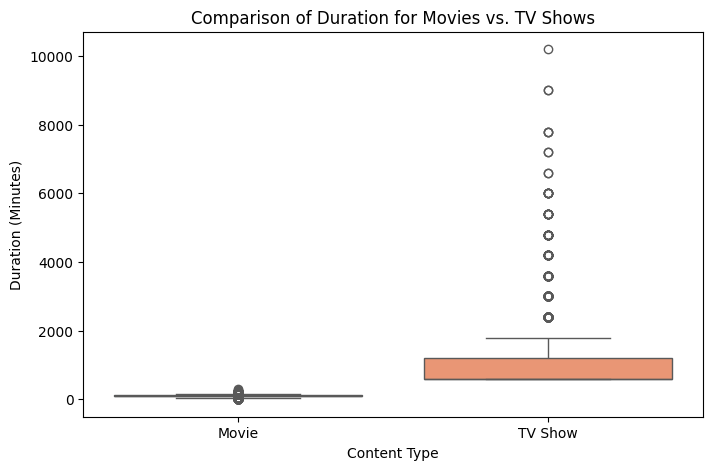

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["content_type"], y=df["duration_minutes"], palette="Set2")
plt.title("Comparison of Duration for Movies vs. TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Duration (Minutes)")
plt.show()

Bar Chart

<ipython-input-47-283160db34dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


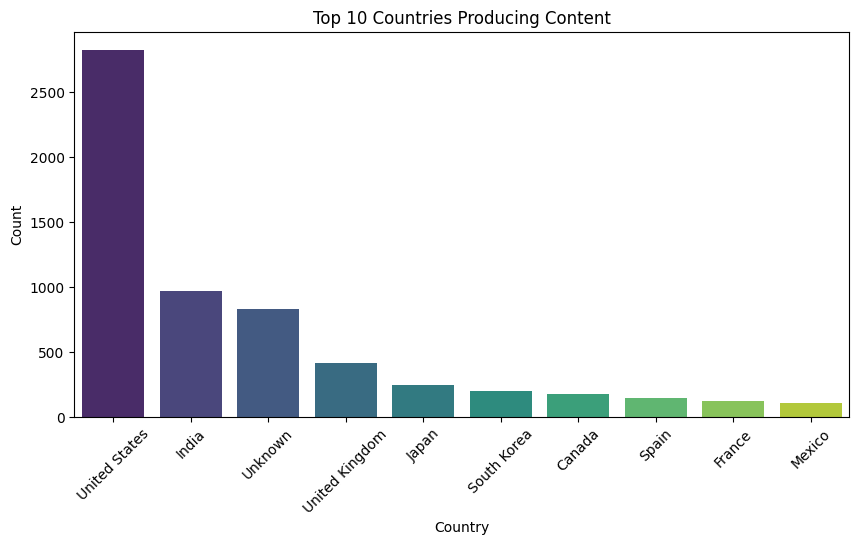

In [47]:
plt.figure(figsize=(10,5))
top_countries = df["country"].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title("Top 10 Countries Producing Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Line Chart

<Figure size 1000x500 with 0 Axes>

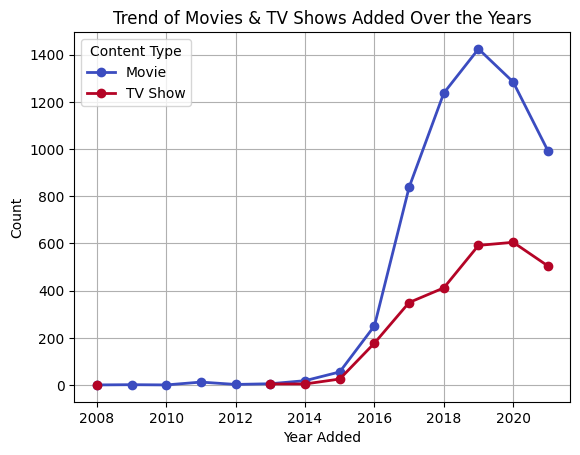

In [48]:
df["year_added"] = pd.to_datetime(df["date_added"]).dt.year
content_trend = df.groupby(["year_added", "content_type"]).size().unstack()

plt.figure(figsize=(10,5))
content_trend.plot(kind="line", marker="o", colormap="coolwarm", linewidth=2)
plt.title("Trend of Movies & TV Shows Added Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.legend(title="Content Type")
plt.grid()
plt.show()

Pie Chart

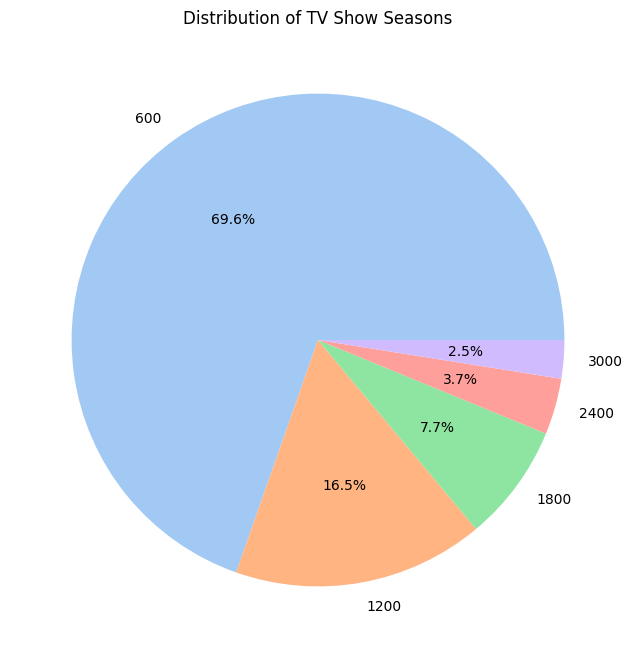

In [50]:
tv_show_seasons = df[df["content_type"] == "TV Show"]["duration_minutes"].value_counts().head(5)

plt.figure(figsize=(8,8))
plt.pie(tv_show_seasons, labels=tv_show_seasons.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Distribution of TV Show Seasons")
plt.show()

Tree Map

In [52]:
!pip install squarify

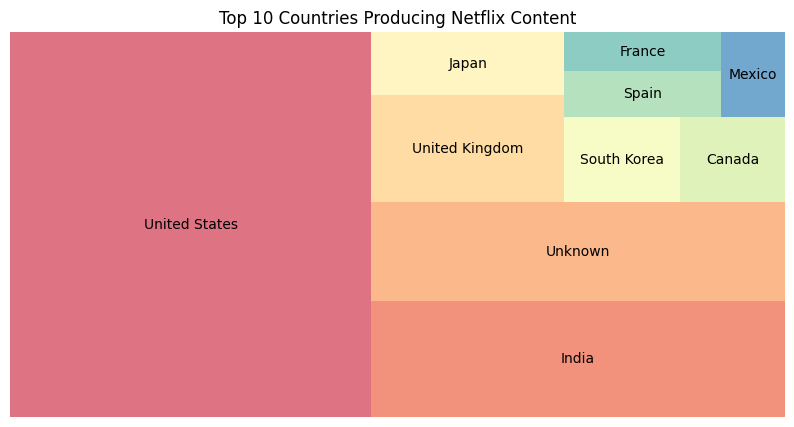

In [53]:
import squarify


top_countries = df["country"].value_counts().head(10)

plt.figure(figsize=(10,5))
squarify.plot(sizes=top_countries.values, label=top_countries.index, alpha=0.7, color=sns.color_palette("Spectral", len(top_countries)))
plt.title("Top 10 Countries Producing Netflix Content")
plt.axis("off")
plt.show()

Insights from Netflix Data Analysis¶
** Top 10 Countries Producing Netflix Content

The United States dominates Netflix content production by a significant margin. Other key contributors include India, the UK, Japan, and South Korea. There is a noticeable presence of "Unknown", which suggests missing or unclassified data. Distribution of Movie/TV Show Duration

Most content on Netflix has a shorter duration, with a sharp peak below 200 minutes. Some extreme outliers go above 10,000 minutes, likely long-running TV shows. The presence of multiple peaks suggests different categories of content (e.g., short films, full-length movies, and series). Genre-wise Trends (Possibly from Other Graphs)

If there was an analysis on popular genres, it would likely show that Drama and Comedy dominate Netflix, with increasing trends in thriller and action genres.**

Recommendations¶
**If analyzing for business insights:

Focus on content from the U.S., India, and the UK, as they have the highest production volumes. Consider regional preferences when suggesting content to users. If analyzing for content duration:

Netflix content mostly consists of short-duration media (likely movies). The presence of long-duration outliers suggests a significant number of TV shows. If making recommendations, filtering out extreme values would improve accuracy.**